In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display

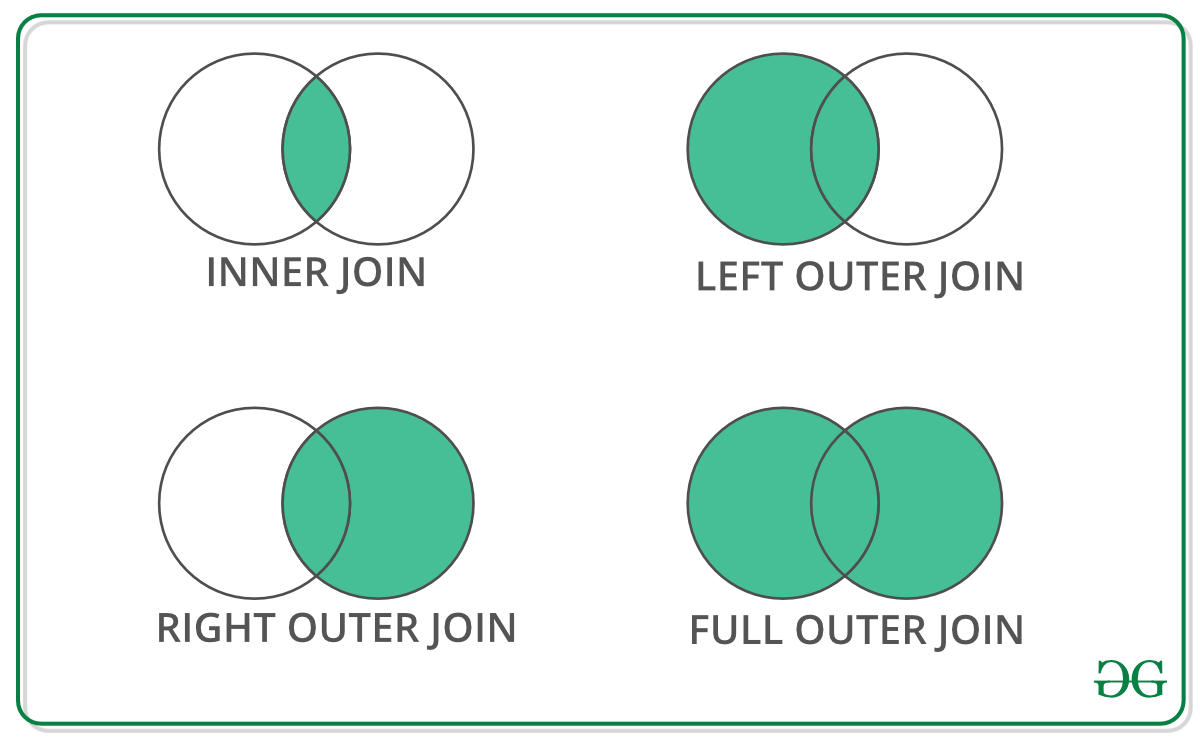

In [5]:
img = Image.open('./imgs/joinimages.png')
display(img)

### concat

In [20]:
df_men = pd.DataFrame({
    'name': ['hasan', 'reza', 'ali', 'sina'],
    'height': [184,173,190,182],
    'weight': [82,np.nan,105,78]
})

df_women = pd.DataFrame({
    'name': ['leila', 'mina', 'negar', 'sara', 'maryam'],
    'height': [164,np.nan,170,158,162],
    'weight': [62,60,58,52, 65]
})

In [21]:
df_men

,name,height,weight
0,hasan,184,82.0
1,reza,173,NaN
2,ali,190,105.0
3,sina,182,78.0


In [22]:
df_women

,name,height,weight
0,leila,164.0,62
1,mina,NaN,60
2,negar,170.0,58
3,sara,158.0,52
4,maryam,162.0,65


In [23]:
pd.concat([df_men, df_women])

,name,height,weight
0,hasan,184.0,82.0
1,reza,173.0,NaN
2,ali,190.0,105.0
3,sina,182.0,78.0
0,leila,164.0,62.0
1,mina,NaN,60.0
2,negar,170.0,58.0
3,sara,158.0,52.0
4,maryam,162.0,65.0


In [26]:
G = pd.concat([df_men, df_women], keys=["Boys", "Girls"])
G

name  height  weight
Boys  0   hasan   184.0    82.0
      1    reza   173.0     NaN
      2     ali   190.0   105.0
      3    sina   182.0    78.0
Girls 0   leila   164.0    62.0
      1    mina     NaN    60.0
      2   negar   170.0    58.0
      3    sara   158.0    52.0
      4  maryam   162.0    65.0

In [28]:
G.loc["Boys"]

,name,height,weight
0,hasan,184.0,82.0
1,reza,173.0,NaN
2,ali,190.0,105.0
3,sina,182.0,78.0


In [30]:
G = pd.concat([df_men, df_women], axis=1, keys=["Boys", "Girls"])
G

Boys                 Girls              
    name height weight    name height weight
0  hasan  184.0   82.0   leila  164.0     62
1   reza  173.0    NaN    mina    NaN     60
2    ali  190.0  105.0   negar  170.0     58
3   sina  182.0   78.0    sara  158.0     52
4    NaN    NaN    NaN  maryam  162.0     65

In [31]:
df_men = pd.DataFrame({
    'name': ['hasan', 'reza', 'ali', 'sina'],
    'height': [184,173,190,182],
    'weight': [82,np.nan,105,78],
    'salary' : [6000,5500,np.nan,6500]
})

df_women = pd.DataFrame({
    'name': ['leila', 'mina', 'negar', 'sara', 'maryam'],
    'height': [164,np.nan,170,158,162],
    'weight': [62,60,58,52, 65],
    'age': [21,24,20,22,25]
})

In [32]:
df_men

,name,height,weight,salary
0,hasan,184,82.0,6000.0
1,reza,173,NaN,5500.0
2,ali,190,105.0,NaN
3,sina,182,78.0,6500.0


In [33]:
df_women

,name,height,weight,age
0,leila,164.0,62,21
1,mina,NaN,60,24
2,negar,170.0,58,20
3,sara,158.0,52,22
4,maryam,162.0,65,25


In [34]:
G = pd.concat([df_men, df_women], keys=["Boys", "Girls"])
G

name  height  weight  salary   age
Boys  0   hasan   184.0    82.0  6000.0   NaN
      1    reza   173.0     NaN  5500.0   NaN
      2     ali   190.0   105.0     NaN   NaN
      3    sina   182.0    78.0  6500.0   NaN
Girls 0   leila   164.0    62.0     NaN  21.0
      1    mina     NaN    60.0     NaN  24.0
      2   negar   170.0    58.0     NaN  20.0
      3    sara   158.0    52.0     NaN  22.0
      4  maryam   162.0    65.0     NaN  25.0

In [35]:
G = pd.concat([df_men, df_women], keys=["Boys", "Girls"], join='inner')
G

name  height  weight
Boys  0   hasan   184.0    82.0
      1    reza   173.0     NaN
      2     ali   190.0   105.0
      3    sina   182.0    78.0
Girls 0   leila   164.0    62.0
      1    mina     NaN    60.0
      2   negar   170.0    58.0
      3    sara   158.0    52.0
      4  maryam   162.0    65.0

### merge

In [44]:
pd.merge(df_men, df_women, how="left")

,name,height,weight,salary,age
0,hasan,184,82.0,6000.0,NaN
1,reza,173,NaN,5500.0,NaN
2,ali,190,105.0,NaN,NaN
3,sina,182,78.0,6500.0,NaN


In [43]:
pd.merge(df_men, df_women, how="outer")

,name,height,weight,salary,age
0,hasan,184.0,82.0,6000.0,NaN
1,reza,173.0,NaN,5500.0,NaN
2,ali,190.0,105.0,NaN,NaN
3,sina,182.0,78.0,6500.0,NaN
4,leila,164.0,62.0,NaN,21.0
5,mina,NaN,60.0,NaN,24.0
6,negar,170.0,58.0,NaN,20.0
7,sara,158.0,52.0,NaN,22.0
8,maryam,162.0,65.0,NaN,25.0


In [45]:
pd.merge(df_men, df_women, how="cross")

,name_x,height_x,weight_x,salary,name_y,height_y,weight_y,age
0,hasan,184,82.0,6000.0,leila,164.0,62,21
1,hasan,184,82.0,6000.0,mina,NaN,60,24
2,hasan,184,82.0,6000.0,negar,170.0,58,20
3,hasan,184,82.0,6000.0,sara,158.0,52,22
4,hasan,184,82.0,6000.0,maryam,162.0,65,25
5,reza,173,NaN,5500.0,leila,164.0,62,21
6,reza,173,NaN,5500.0,mina,NaN,60,24
7,reza,173,NaN,5500.0,negar,170.0,58,20
8,reza,173,NaN,5500.0,sara,158.0,52,22
9,reza,173,NaN,5500.0,maryam,162.0,65,25


### combine_first

In [50]:
df_men.combine_first(df_women)

,age,height,name,salary,weight
0,21,184.0,hasan,6000.0,82.0
1,24,173.0,reza,5500.0,60.0
2,20,190.0,ali,NaN,105.0
3,22,182.0,sina,6500.0,78.0
4,25,162.0,maryam,NaN,65.0


In [51]:
df_women.combine_first(df_men)

,age,height,name,salary,weight
0,21,164.0,leila,6000.0,62.0
1,24,173.0,mina,5500.0,60.0
2,20,170.0,negar,NaN,58.0
3,22,158.0,sara,6500.0,52.0
4,25,162.0,maryam,NaN,65.0


In [52]:
# pivot

In [18]:
std = pd.DataFrame({
    "name": ['Ahmad', 'Ahmad', 'Saeed', 'Saeed', 'Mohammad', 'Mohammad', 'Sara', 'Sara', 'Mahsa', 'Mahsa'],
    "term": ['midterm', 'final','midterm', 'final','midterm', 'final','midterm', 'final','midterm', 'final'],
    "Machine Learning": [6,5,7,8,4,6,9,8,4,3],
    "Artificial Intelligence": [5,7,4,8,5,7,7,6,5,6]
})
std

,name,term,Machine Learning,Artificial Intelligence
0,Ahmad,midterm,6,5
1,Ahmad,final,5,7
2,Saeed,midterm,7,4
3,Saeed,final,8,8
4,Mohammad,midterm,4,5
5,Mohammad,final,6,7
6,Sara,midterm,9,7
7,Sara,final,8,6
8,Mahsa,midterm,4,5
9,Mahsa,final,3,6


In [19]:
std_pvt = std.pivot(index='name', columns='term', values=['Machine Learning','Artificial Intelligence'])
std_pvt

Machine Learning         Artificial Intelligence        
term                final midterm                   final midterm
name                                                             
Ahmad                   5       6                       7       5
Mahsa                   3       4                       6       5
Mohammad                6       4                       7       5
Saeed                   8       7                       8       4
Sara                    8       9                       6       7

In [20]:
ml_score = std_pvt['Machine Learning'].values[:,0] + std_pvt['Machine Learning'].values[:,1]
ai_score = std_pvt['Artificial Intelligence'].values[:,0] + std_pvt['Artificial Intelligence'].values[:,1]
std_pvt.insert(2,column='ML agg score' , value=ml_score)
std_pvt.insert(5,column='AI agg score' , value=ai_score)

In [21]:
std_pvt

Machine Learning         ML agg score Artificial Intelligence  \
term                final midterm                                final   
name                                                                     
Ahmad                   5       6           11                       7   
Mahsa                   3       4            7                       6   
Mohammad                6       4           10                       7   
Saeed                   8       7           15                       8   
Sara                    8       9           17                       6   

                 AI agg score  
term     midterm               
name                           
Ahmad          5           12  
Mahsa          5           11  
Mohammad       5           12  
Saeed          4           12  
Sara           7           13

In [22]:
std_pvt = std.pivot(index='name', columns='term', values=['Machine Learning','Artificial Intelligence'])
std_pvt.stack()

Machine Learning  Artificial Intelligence
name     term                                              
Ahmad    final                   5                        7
         midterm                 6                        5
Mahsa    final                   3                        6
         midterm                 4                        5
Mohammad final                   6                        7
         midterm                 4                        5
Saeed    final                   8                        8
         midterm                 7                        4
Sara     final                   8                        6
         midterm                 9                        7

In [23]:
std_pvt.unstack()

                         term     name    
Machine Learning         final    Ahmad       5
                                  Mahsa       3
                                  Mohammad    6
                                  Saeed       8
                                  Sara        8
                         midterm  Ahmad       6
                                  Mahsa       4
                                  Mohammad    4
                                  Saeed       7
                                  Sara        9
Artificial Intelligence  final    Ahmad       7
                                  Mahsa       6
                                  Mohammad    7
                                  Saeed       8
                                  Sara        6
                         midterm  Ahmad       5
                                  Mahsa       5
                                  Mohammad    5
                                  Saeed       4
                                  Sara       

In [24]:
std.set_index(['name', 'term'])

Machine Learning  Artificial Intelligence
name     term                                              
Ahmad    midterm                 6                        5
         final                   5                        7
Saeed    midterm                 7                        4
         final                   8                        8
Mohammad midterm                 4                        5
         final                   6                        7
Sara     midterm                 9                        7
         final                   8                        6
Mahsa    midterm                 4                        5
         final                   3                        6

In [12]:
std = pd.DataFrame({
    "Name": ['Ahmad', 'Saeed', 'Mohammad', 'Sara', 'Mahsa'],
    "Data Mining": [17,19,16,18,15],
    "Machine Learning": [12,18,14,16,17],
    "Artificial Intelligence": [13,20,14,15,13]
})
std

,Name,Data Mining,Machine Learning,Artificial Intelligence
0,Ahmad,17,12,13
1,Saeed,19,18,20
2,Mohammad,16,14,14
3,Sara,18,16,15
4,Mahsa,15,17,13


In [14]:
std_melt = std.melt(id_vars="Name", var_name="Courses", value_name="Score")
std_melt

,Name,Courses,Score
0,Ahmad,Data Mining,17
1,Saeed,Data Mining,19
2,Mohammad,Data Mining,16
3,Sara,Data Mining,18
4,Mahsa,Data Mining,15
5,Ahmad,Machine Learning,12
6,Saeed,Machine Learning,18
7,Mohammad,Machine Learning,14
8,Sara,Machine Learning,16
9,Mahsa,Machine Learning,17


In [17]:
std_melt.pivot(index="Name", columns="Courses")

Score                             
Courses  Artificial Intelligence Data Mining Machine Learning
Name                                                         
Ahmad                         13          17               12
Mahsa                         13          15               17
Mohammad                      14          16               14
Saeed                         20          19               18
Sara                          15          18               16

In [37]:
np.random.seed(1)
df = pd.DataFrame([
    np.random.randint(10,100,5),
    np.random.randint(10,100,5),
    np.random.randint(10,100,5),
    np.random.randint(10,100,5),
    np.random.randint(10,100,5),
    np.random.randint(10,100,5),
    np.random.randint(10,100,5),
    np.random.randint(10,100,5)], columns=['A','B','C','D','E']
)
df

,A,B,C,D,E
0,47,22,82,19,85
1,15,89,74,26,11
2,86,81,16,35,60
3,30,28,94,21,38
4,39,24,60,78,97
5,97,96,23,19,17
6,73,71,32,67,11
7,10,70,91,18,98


In [40]:
df2 = df.take([3,6,4])
df2

,A,B,C,D,E
3,30,28,94,21,38
6,73,71,32,67,11
4,39,24,60,78,97


In [42]:
random = np.random.permutation(8)
random

array([7, 2, 0, 4, 1, 5, 6, 3])

In [43]:
df.take(random)

,A,B,C,D,E
7,10,70,91,18,98
2,86,81,16,35,60
0,47,22,82,19,85
4,39,24,60,78,97
1,15,89,74,26,11
5,97,96,23,19,17
6,73,71,32,67,11
3,30,28,94,21,38


In [45]:
df.sample(2)

,A,B,C,D,E
7,10,70,91,18,98
5,97,96,23,19,17


In [47]:
df.sample(2 , random_state=21)

,A,B,C,D,E
2,86,81,16,35,60
7,10,70,91,18,98


In [48]:
df.sample(frac=0.5)

,A,B,C,D,E
4,39,24,60,78,97
3,30,28,94,21,38
5,97,96,23,19,17
6,73,71,32,67,11


In [49]:
df.sample(frac=0.75)

,A,B,C,D,E
0,47,22,82,19,85
2,86,81,16,35,60
1,15,89,74,26,11
3,30,28,94,21,38
4,39,24,60,78,97
5,97,96,23,19,17


# Read and write

In [2]:
df = pd.read_csv('./datasets/iris.csv')
df.shape

(150, 5)

In [3]:
df_csv = df.iloc[0:20,:]
df_csv.to_csv('./datasets/iris_test.csv', index=None)
df_csv.shape

(20, 5)

In [62]:
# pd.read_csv('...', header=None) 
# pd.read_csv('...', names=['a','b','c']) 
# pd.read_csv('...', skiprows=[0]) 

### excel , json , html , ...

In [4]:
df_csv.to_excel('./datasets/iris_test.xlsx', index=None)

In [5]:
pd.read_excel('./datasets/iris_test.xlsx').shape

(20, 5)

In [6]:
df_csv.to_json('./datasets/iris_test.json')

In [7]:
pd.read_json('./datasets/iris_test.json').shape

(20, 5)

In [8]:
df_csv.to_html('./datasets/iris_test.html', index=None)

In [9]:
df_html = pd.read_html('./datasets/iris_test.html')
df_html

[    sepal.length  sepal.width  petal.length  petal.width variety
 0            5.1          3.5           1.4          0.2  Setosa
 1            4.9          3.0           1.4          0.2  Setosa
 2            4.7          3.2           1.3          0.2  Setosa
 3            4.6          3.1           1.5          0.2  Setosa
 4            5.0          3.6           1.4          0.2  Setosa
 5            5.4          3.9           1.7          0.4  Setosa
 6            4.6          3.4           1.4          0.3  Setosa
 7            5.0          3.4           1.5          0.2  Setosa
 8            4.4          2.9           1.4          0.2  Setosa
 9            4.9          3.1           1.5          0.1  Setosa
 10           5.4          3.7           1.5          0.2  Setosa
 11           4.8          3.4           1.6          0.2  Setosa
 12           4.8          3.0           1.4          0.1  Setosa
 13           4.3          3.0           1.1          0.1  Setosa
 14       

In [10]:
type(df_html)

list

In [11]:
html_to_DataFrame = df_html[0]
html_to_DataFrame

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [12]:
type(html_to_DataFrame)

pandas.core.frame.DataFrame